In [1]:
import os
import requests 
import time
import string
import networkx as nx
import itertools
import networkx as nx
import pandas as pd
import json
import re
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

from nltk.corpus import wordnet as wn #importing it
from nltk.stem.wordnet import WordNetLemmatizer #importing wordnet lemmatizer
from nltk import pos_tag #part-of-speech-tagger
from collections import defaultdict #defaultdict returns default value for non-existant keys you try to  access based on the function you passed in the constructor
#from google.colab import files

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/daniele/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# creation file all_tweets

In [2]:
china= pd.read_csv("../data/4.countries/China.csv",dtype ={"id_str": str})
america = pd.read_csv("../data/4.countries/USA.csv",dtype ={"id_str": str})

/home/daniele/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (34,35,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
import json
import re

def extract_text(df):     # extract the text from the tweets
    list_strings = []
    i=0
    for index in range(len(df)):
        string = (df.loc[index]['extended_tweet'])
    
        if type(string) == str :
            if re.search(':(.+?)https',string):
                ss = re.search(':(.+?)https',string).group(1)
            list_strings.append(ss)

        else:

            list_strings.append(df.loc[index]['text'])
        i=i+1

    return list_strings

In [4]:
china_text = extract_text(china)

In [5]:
china_text[3]

" 'China and the world has made great strides in tracking infectious diseases but the #coronavirus is taking unexpected turns, making it hard to track.\\n"

In [6]:
china["extended"] = china_text

In [7]:
USA_text = extract_text(america)

In [8]:
USA_text[7]

" 'China revokes press credentials of three at Wall Street Journal over coronavirus opinion piece the gov’t deemed to be ‘racist’.\\n\\nFollow the latest on #COVID19: "

In [9]:
america["extended"] = USA_text
all_tweets = america.append( china)
all_tweets

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,account,period,scopes,extended
0,Fri Feb 21 10:50:29 +0000 2020,1230806996087169024,1230806996087169024,'Shameful'\n\nUkrainians attack a bus carrying...,"[0, 140]","<a href=""https://about.twitter.com/products/tw...",True,1.230779e+18,1.230779e+18,4970411.0,...,NaN,NaN,NaN,NaN,NaN,NaN,AJ,JanFeb2020,NaN,"""'Shameful'\n\nUkrainians attack a bus carryi..."
1,Fri Feb 21 06:07:11 +0000 2020,1230735700745539590,1230735700745539590,RT @AJENews: China's Hubei says 220 people fro...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,{'created_at': 'Fri Feb 21 06:06:59 +0000 2020...,NaN,NaN,NaN,NaN,NaN,AJ,JanFeb2020,NaN,RT @AJENews: China's Hubei says 220 people fro...
2,Fri Feb 21 00:15:25 +0000 2020,1230647176990253061,1230647176990253061,China coronavirus outbreak: All the latest upd...,NaN,"<a href=""https://trueanthem.com/"" rel=""nofollo...",False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AJ,JanFeb2020,NaN,China coronavirus outbreak: All the latest upd...
3,Thu Feb 20 06:15:29 +0000 2020,1230375401874169866,1230375401874169866,China expels foreign journalists as coronaviru...,NaN,"<a href=""https://trueanthem.com/"" rel=""nofollo...",False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AJ,JanFeb2020,NaN,China expels foreign journalists as coronaviru...
4,Thu Feb 20 00:45:33 +0000 2020,1230292370027163649,1230292370027163649,China coronavirus outbreak: All the latest upd...,NaN,"<a href=""https://trueanthem.com/"" rel=""nofollo...",False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AJ,JanFeb2020,NaN,China coronavirus outbreak: All the latest upd...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9345,Wed Mar 17 12:23:13 +0000 2021,1372161599176200198,1372161599176200198,China has approved the emergency use of a self...,"[0, 140]","<a href=""http://static.cms.xinhua-news.cn/sm/t...",True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,XHN,MarchApril2021,NaN,'China has approved the emergency use of a se...
9346,Wed Mar 17 12:10:57 +0000 2021,1372158510683725824,1372158510683725824,"As Fawziya Abikar Nur, Minister of Health and ...","[0, 140]","<a href=""http://static.cms.xinhua-news.cn/sm/t...",True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,XHN,MarchApril2021,NaN,"'As Fawziya Abikar Nur, Minister of Health an..."
9347,Wed Mar 17 11:30:31 +0000 2021,1372148338842169346,1372148338842169346,Another Chinese #COVID19 vaccine obtained emer...,"[0, 140]","<a href=""http://static.cms.xinhua-news.cn/sm/t...",True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,XHN,MarchApril2021,NaN,"""Another Chinese #COVID19 vaccine obtained em..."
9348,Wed Mar 17 06:55:35 +0000 2021,1372079148584169481,1372079148584169481,LIVE: Pakistan begins vaccinating its citizens...,NaN,"<a href=""https://periscope.tv"" rel=""nofollow"">...",True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,XHN,MarchApril2021,NaN,"""LIVE: Pakistan begins vaccinating its citize..."


In [10]:
all_tweets.drop_duplicates(subset='id',inplace=True)
all_tweets

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,account,period,scopes,extended
0,Fri Feb 21 10:50:29 +0000 2020,1230806996087169024,1230806996087169024,'Shameful'\n\nUkrainians attack a bus carrying...,"[0, 140]","<a href=""https://about.twitter.com/products/tw...",True,1.230779e+18,1.230779e+18,4970411.0,...,NaN,NaN,NaN,NaN,NaN,NaN,AJ,JanFeb2020,NaN,"""'Shameful'\n\nUkrainians attack a bus carryi..."
1,Fri Feb 21 06:07:11 +0000 2020,1230735700745539590,1230735700745539590,RT @AJENews: China's Hubei says 220 people fro...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,{'created_at': 'Fri Feb 21 06:06:59 +0000 2020...,NaN,NaN,NaN,NaN,NaN,AJ,JanFeb2020,NaN,RT @AJENews: China's Hubei says 220 people fro...
2,Fri Feb 21 00:15:25 +0000 2020,1230647176990253061,1230647176990253061,China coronavirus outbreak: All the latest upd...,NaN,"<a href=""https://trueanthem.com/"" rel=""nofollo...",False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AJ,JanFeb2020,NaN,China coronavirus outbreak: All the latest upd...
3,Thu Feb 20 06:15:29 +0000 2020,1230375401874169866,1230375401874169866,China expels foreign journalists as coronaviru...,NaN,"<a href=""https://trueanthem.com/"" rel=""nofollo...",False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AJ,JanFeb2020,NaN,China expels foreign journalists as coronaviru...
4,Thu Feb 20 00:45:33 +0000 2020,1230292370027163649,1230292370027163649,China coronavirus outbreak: All the latest upd...,NaN,"<a href=""https://trueanthem.com/"" rel=""nofollo...",False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AJ,JanFeb2020,NaN,China coronavirus outbreak: All the latest upd...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9340,Thu Mar 18 11:50:51 +0000 2021,1372515843955851264,1372515843955851264,Tap https://t.co/aSutOvQ62X for Asia-Pacific #...,"[0, 140]","<a href=""http://static.cms.xinhua-news.cn/sm/t...",True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,XHN,MarchApril2021,NaN,"""Tap"
9341,Thu Mar 18 11:01:40 +0000 2021,1372503462601129991,1372503462601129991,Namibia will launch its #COVID19 vaccination c...,"[0, 140]","<a href=""http://static.cms.xinhua-news.cn/sm/t...",True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,XHN,MarchApril2021,NaN,'Namibia will launch its #COVID19 vaccination...
9346,Wed Mar 17 12:10:57 +0000 2021,1372158510683725824,1372158510683725824,"As Fawziya Abikar Nur, Minister of Health and ...","[0, 140]","<a href=""http://static.cms.xinhua-news.cn/sm/t...",True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,XHN,MarchApril2021,NaN,"'As Fawziya Abikar Nur, Minister of Health an..."
9347,Wed Mar 17 11:30:31 +0000 2021,1372148338842169346,1372148338842169346,Another Chinese #COVID19 vaccine obtained emer...,"[0, 140]","<a href=""http://static.cms.xinhua-news.cn/sm/t...",True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,XHN,MarchApril2021,NaN,"""Another Chinese #COVID19 vaccine obtained em..."


In [11]:
 #select id_str and texts and save
import csv
all_tweets=all_tweets[['id_str','extended']]
#all_tweets.to_csv('../LIWK_files/all_tweets.csv',index=False, quoting=csv.QUOTE_NONNUMERIC) # here the quoting is to avoid index approximation

# division per country and periods

In [15]:
## start by dividing the liwk files by country and time periods.

#read files
pdLIWK = pd.read_excel('../LIWK_files/LIWC2015 Results (all_tweets).xlsx', engine='openpyxl',dtype ={"Source (A)": str})
pd_indexes= pd.read_csv('../LIWK_files/all_tweets.csv',dtype ={"id_str": str})

china1= pd.read_csv("../data/3.countries+periods/China_JanFeb2020.csv",dtype ={"id_str": str})
china2 = pd.read_csv("../data/3.countries+periods/China_SeptOct2020.csv",dtype ={"id_str": str})
china3= pd.read_csv("../data/3.countries+periods/China_MarchApril2021.csv",dtype ={"id_str": str})

america1= pd.read_csv("../data/3.countries+periods/USA_JanFeb2020.csv",dtype ={"id_str": str})
america2 = pd.read_csv("../data/3.countries+periods/USA_SeptOct2020.csv",dtype ={"id_str": str})
america3= pd.read_csv("../data/3.countries+periods/USA_MarchApril2021.csv",dtype ={"id_str": str})

#pdLIWK.to_csv("../LIWK_files/LIWK_results_full.csv")  #save to csv

#pdLIWK["Source (A)"] = [ pdLIWK["Source (A)"][i][:-5] for i in range(len(pdLIWK))]

/home/daniele/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


The indexes of the tweets are distorted in the excel file, so I change it back with the original one :

In [17]:
#get index of the tweets 
print(pdLIWK[["Source (A)","Source (B)"]][0:10])
print(pd_indexes[["id_str","extended"]][0:10])
pdLIWK["Source (A)"] = pd_indexes["id_str"]
#pdLIWK[pdLIWK["Source (A)"].isin(america["id_str"])] 


            Source (A)                                         Source (B)
0  1230806996087160060   "'Shameful'\n\nUkrainians attack a bus carryi...
1  1230735700745530110  RT @AJENews: China's Hubei says 220 people fro...
2  1230647176990249980  China coronavirus outbreak: All the latest upd...
3  1230375401874160130  China expels foreign journalists as coronaviru...
4  1230292370027160060  China coronavirus outbreak: All the latest upd...
5  1230164648009309950   'At least 2,004 people in mainland China have...
6  1230136882861949950  RT @AJENews: UN AIDS agency warns that HIV pat...
7  1230056202807180030   'China revokes press credentials of three at ...
8  1230054445251160060   'As of February 19, there were at least 14,00...
9  1230046864700950020   "There's concern over China's mass surveillan...
                id_str                                           extended
0  1230806996087169024   "'Shameful'\n\nUkrainians attack a bus carryi...
1  1230735700745539590  RT @AJENews: C

In [14]:
print("china unique tweets",len(np.unique(china["id_str"]) ) )
print("america unique tweets",len(np.unique(america["id_str"]) ) )

china unique tweets 7070
america unique tweets 14123


## save the sub df of the result in new files

In [18]:

america1L=pdLIWK[pdLIWK["Source (A)"].isin(america1["id_str"])] 
america2L=pdLIWK[pdLIWK["Source (A)"].isin(america2["id_str"])] 
america3L=pdLIWK[pdLIWK["Source (A)"].isin(america3["id_str"])] 

americaTL=pdLIWK[pdLIWK["Source (A)"].isin(america["id_str"])] 

china1L=pdLIWK[pdLIWK["Source (A)"].isin(china1["id_str"])] 
china2L=pdLIWK[pdLIWK["Source (A)"].isin(china2["id_str"])] 
china3L=pdLIWK[pdLIWK["Source (A)"].isin(china3["id_str"])] 

chinaTL=pdLIWK[pdLIWK["Source (A)"].isin(china["id_str"])] 
'''
path="../LIWK_files/"

america1L.to_csv(path+'USA_JanFeb2020L.csv',index=False)
america2L.to_csv(path+'USA_SeptOct2020L.csv',index=False)
america3L.to_csv(path+'USA_MarchApril2021L.csv',index=False)

americaTL.to_csv(path+'USAL.csv',index=False)


china1L.to_csv(path+'China_JanFeb2020L.csv',index=False)
china2L.to_csv(path+'China_SeptOct2020L.csv',index=False)
china3L.to_csv(path+'China_MarchApril2021L.csv',index=False)

chinaTL.to_csv(path+'ChinaL.csv',index=False)
'''

'\npath="../LIWK_files/"\n\namerica1L.to_csv(path+\'USA_JanFeb2020L.csv\',index=False)\namerica2L.to_csv(path+\'USA_SeptOct2020L.csv\',index=False)\namerica3L.to_csv(path+\'USA_MarchApril2021L.csv\',index=False)\n\namericaTL.to_csv(path+\'USAL.csv\',index=False)\n\n\nchina1L.to_csv(path+\'China_JanFeb2020L.csv\',index=False)\nchina2L.to_csv(path+\'China_SeptOct2020L.csv\',index=False)\nchina3L.to_csv(path+\'China_MarchApril2021L.csv\',index=False)\n\nchinaTL.to_csv(path+\'ChinaL.csv\',index=False)\n'

In [19]:
# some stat
print( "china:\n ",china3L.mean(axis=0)[["Authentic","they","anger", "negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power"] ])
print("\n USA:\n ", america3L.mean(axis=0)[["Authentic","they","anger","negemo","posemo","death","focuspresent","focuspast","focusfuture", "affiliation","drives", "achieve","power"] ] )

china:
  Authentic       32.362143
they             0.211277
anger            0.217183
negemo           0.911846
posemo           1.129493
death            0.310079
focuspresent     4.480499
focuspast        1.877874
focusfuture      0.528985
affiliation      0.784689
drives           5.768478
achieve          1.388749
power            3.004891
dtype: float64

 USA:
  Authentic       18.687811
they             0.222035
anger            0.307338
negemo           1.375377
posemo           1.049264
death            0.444181
focuspresent     4.169054
focuspast        1.279440
focusfuture      0.689280
affiliation      0.912369
drives           6.007406
achieve          1.200238
power            2.988970
dtype: float64


## Dummy projections---(actually no projectio!!) (simple average and sum)

In [20]:
from wordcloud import WordCloud
def plot_wordcloud(dictionary):
    wordcloud = WordCloud(background_color='white',
                          width=1500,
                          height=1000
                          ).generate_from_frequencies(dictionary)
    # use .generate(space_separated_string) - to generate cloud from text

    plt.figure(figsize=(9,6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [21]:
# functions from NS_word_meas
def cleaner(tweet,word_list = stopwords.words('english')):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) # remove mentions
    tweet = re.sub("#[A-Za-z0-9]+", "",tweet) # remove hashtags
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) # remove http links
    tweet = " ".join(tweet.split())
    tweet = str.lower(tweet) #to lowercase
    table = str.maketrans(dict.fromkeys(string.punctuation)) 
    tweet = tweet.translate(table)# remove punctuation

    special_characters = ['rt','dr','“','rt','the','to','of','a','an','on','has','have','had','is','was','did','n','et','ha','lt','1','2','5']

    tweet = tweet.split()      
    tweet = ' '.join([ word for word in tweet if word not in word_list and word not in special_characters  ])   #remove useless words
    return tweet



#initialize an empty dict

def frequency_marker_dictionary(df,df2,markstring):   ##dummy marker assignment
    mark_words = {}
    count_words = {}
    i=0
    for row in df:
        for word in row.split():
            #if the word is encountered for the first time add to dict as key and set its value to 0
            mark_words.setdefault(word, 0)
            count_words.setdefault(word, 0)
            #increase the value of a word by the average of the previous values and the new one tweet value
            mark_words[word] = mark_words[word] + df2.iloc[i][markstring]  
            count_words[word] += 1
        i+=1
    return mark_words, count_words

In [22]:
# this is the code provided by Lejla for cleaning, lemmatising and pos tagging tweets

nltk.download('words')
words = set(nltk.corpus.words.words()) #the last two lines serve to download the corpus of standard English language words
nltk.download('stopwords') #downloading stopwords
stop_words = set(nltk.corpus.stopwords.words("english")) #taking the stop words from English language
nltk.download('wordnet') #downloading wordnet
from nltk.corpus import wordnet as wn #importing it
from nltk.stem.wordnet import WordNetLemmatizer #importing wordnet lemmatizer
from nltk import pos_tag #part-of-speech-tagger
nltk.download('averaged_perceptron_tagger') #downloading tagger
from collections import defaultdict #defaultdict returns default value for non-existant keys you try to  access based on the function you passed in the constructor
tag_map = defaultdict(lambda : wn.NOUN) #here we define that wn.NOUN is the default value for the dict
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

def lemma_pos_cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) # remove mentions
    tweet = re.sub("#[A-Za-z0-9]+", "",tweet) # remove hashtags
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) # remove http links
    tweet = " ".join(tweet.split())
    tweet = str.lower(tweet) #to lowercase
    tweet = re.sub("'", " ", tweet)  # remove aphostrophe

    #basically we use pos_tag function on tokens that we get by applying wordpunct tokenization
    #to tweet (it separates all the words and symbols)
    #then we pass the token along with it's wordnet pos value that we get from the tag_map dictionary (noun, adjective, verb or adverb) to the lemma function (the WordNetLemmatizer())
    lemma_function = WordNetLemmatizer()
    tweet = " ".join(lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in nltk.pos_tag(nltk.wordpunct_tokenize(tweet))) #lemmatize

    # francesco: I removed also all 2 letters words and added specific words, words that appears frequently but are discarded because they are not in the english language and len(w)>2
    specific_words=['virus', 'coronavirus', 'covid19', 'covid', 'trump', 'hubei', 'beijing', 'xinjiang', 'jinping', 'korea', 'xinhua', 'india', 'taiwan','johnson','singapore', 'africa', 'japanese', 'france', 'asian', 'australia', 'french', 'asia', 'leishenshan', 'british', 'qingdao', 'fauci', 'america',  'california', 'sichuan', 'malaysia', 'huawei','thailand', 'shandong', 'italy', 'philippines', 'germany', 'facebook', 'african', 'shenzhen', 'tokyo', 'russian','uygur', '5g', 'pompeo', 'vietnam', 'australian', 'cambodia', 'zhejiang', 'yunnan', 'guangdong', 'korean', 'iran', 'washington']
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) if (w in words or w in specific_words) and w not in stop_words ) #remove stop words
   
    return tweet

[nltk_data] Downloading package words to /home/daniele/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/daniele/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/daniele/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/daniele/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [23]:
## Adjacency matrix building
def adj_matrix(freq_dict,cleaned_df_text):   

    words = sorted(list(freq_dict.keys()))

    A = pd.DataFrame(np.zeros((len(words),len(words))), columns = words, index = words )

    for phrase in cleaned_df_text:

        words_list = phrase.split()

        couples = [(words_list[i],words_list[j]) for i in range(len(words_list)) for j in range(i+1,len(words_list))]

        for w1,w2 in couples:

              A.loc[w1,w2] += 1

    return np.maximum( A, A.transpose() )

def threshold(vector,threshold):

    l = [(el,vector[el]) for el in vector if vector[el] >= threshold ]

    print(pd.DataFrame(l))

    return 

In [24]:
df_text = chinaTL["Source (B)"]
cleaned_df_text = [lemma_pos_cleaner(el) for el in df_text]

In [25]:
cleaned_df_text[0:4]

['talk w university challenge china face deal misconception people medium watch n n',
 'spring always bring along lively saturate sea colorful bloom flower n look collection flower blossom across china enjoy upcoming new season',
 'mean carnival brazil year one samba school take inspiration china n n',
 'china world make great stride track infectious disease take unexpected turn make hard track n']

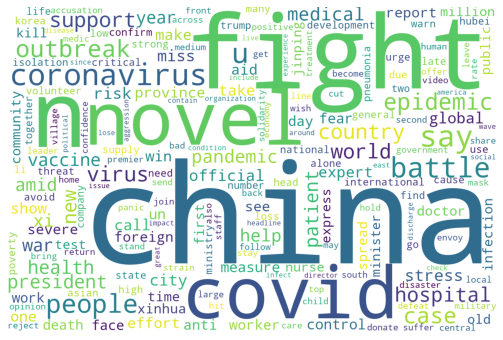

In [40]:
marker_dict, freq_dict = frequency_marker_dictionary(cleaned_df_text, chinaTL,"negemo" )
plot_wordcloud(marker_dict) #This is the wordcloud of the sum of the marker a words has got in each tweet is in

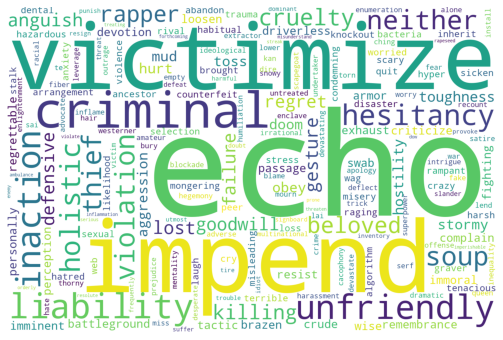

In [43]:
marker_freq = marker_dict.copy()
for word, value in marker_dict.items() : 
    marker_dict[word] = value / freq_dict[word]

plot_wordcloud(marker_dict) # This is the wordcloud of the average of the marker a words has got

In [29]:
A = adj_matrix(freq_dict,cleaned_df_text)   #version to improve for efficiency

In [30]:
# Constructing the graph object from the adjacency matrix
G = nx.convert_matrix.from_numpy_array(A.to_numpy())
G = nx.relabel_nodes(G , mapping = dict([ (i,sorted(list(freq_dict.keys()))[i]) for i in range(len(freq_dict.keys())) ]) ) 
print('is connected: ',nx.is_connected(G))

is connected:  True


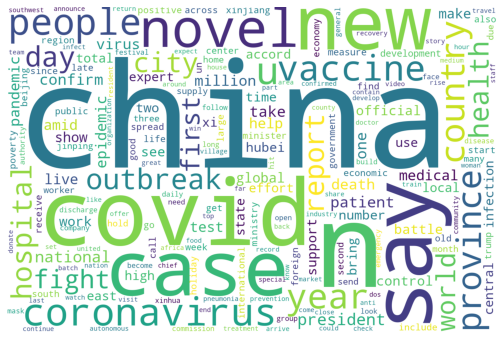

In [59]:
# Calculating the dummy pagerank on graph G
pr3 = nx.algorithms.pagerank(G)
pr3 = dict(sorted(pr3.items(), key=lambda item: item[1],reverse  = True))
#threshold(pr3,0.003)
plot_wordcloud(pr3) #basic pagerank result

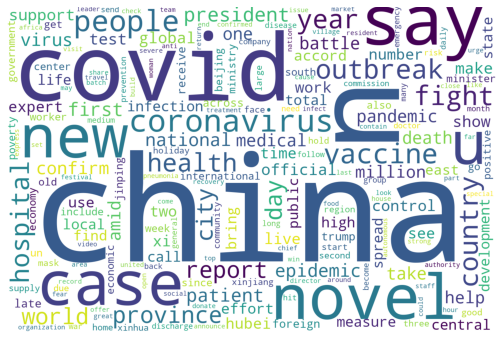

In [56]:
# Calculating the pagerank on graph G, using as weight for teleportation the average marker value
pr = nx.algorithms.pagerank(G,personalization=marker_dict)
pr = dict(sorted(pr.items(), key=lambda item: item[1],reverse  = True))
#threshold(pr,0.003)
plot_wordcloud(pr) #This is the wordcloud of the result of pagerank giving the average marker dict as teleportation vector

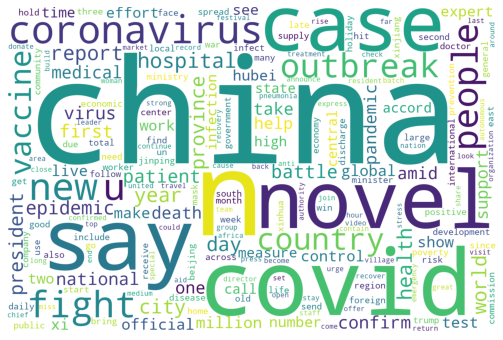

In [58]:
# Calculating the pagerank on graph G, using as weight for teleportation the frequency value
pr2 = nx.algorithms.pagerank(G,personalization=marker_freq)
pr2 = dict(sorted(pr2.items(), key=lambda item: item[1],reverse  = True))
#threshold(pr2,0.003)
plot_wordcloud(pr2) # same as above but this time considering the total sum marker dict

In [ ]:
'''
path= "../graph_data/china/"
filename = path +"edgelist.csv"
nx.write_weighted_edgelist(G, filename, delimiter=",")
#add header with appropriate column names
!sed --in-place 1i"Source,Target,Weight" ../graph_data/all_tweets/edgelist.csv

word_nodes = pd.DataFrame.from_dict(freq_dict,orient="index")
word_nodes.reset_index(inplace=True)
word_nodes["Label"] = word_nodes["index"]
word_nodes.rename(columns={"index":"Id",0:"delete"},inplace=True)
word_nodes = word_nodes.drop(columns=['delete'])
word_nodes.to_csv(path + 'nodelist.csv',index=False)

'''

In [26]:
# all in a function 

def dummy_projections(df_text,df_marker, emo = "negemo", plotWC= True):
    cleaned_df_text = [lemma_pos_cleaner(el) for el in df_text]
    marker_dict, freq_dict = frequency_marker_dictionary(cleaned_df_text, df_marker,emo )
    if plotWC== True :
        plot_wordcloud(marker_dict) #This is the wordcloud of the sum of the marker a words has got in each tweet is in

    marker_freq = marker_dict.copy()
    for word, value in marker_dict.items() : 
        marker_dict[word] = value / freq_dict[word]

    if plotWC== True :
        plot_wordcloud(marker_dict) # This is the wordcloud of the average of the marker a words has got

    A = adj_matrix(freq_dict,cleaned_df_text)   #version to improve for efficiency

    # Constructing the graph object from the adjacency matrix
    G = nx.convert_matrix.from_numpy_array(A.to_numpy())
    G = nx.relabel_nodes(G , mapping = dict([ (i,sorted(list(freq_dict.keys()))[i]) for i in range(len(freq_dict.keys())) ]) ) 
    print('is connected: ',nx.is_connected(G))

    # Calculating the pagerank on graph G, using as weight for teleportation the average marker value
    pr = nx.algorithms.pagerank(G,personalization=marker_dict)
    pr = dict(sorted(pr.items(), key=lambda item: item[1],reverse  = True))
    #threshold(pr,0.003)

    if plotWC== True :
        plot_wordcloud(pr) #This is the wordcloud of the result of pagerank giving the average

    # Calculating the pagerank on graph G, using as weight for teleportation the frequency value
    pr2 = nx.algorithms.pagerank(G,personalization=marker_freq)
    pr2 = dict(sorted(pr2.items(), key=lambda item: item[1],reverse  = True))
    #threshold(pr2,0.003)
    if plotWC== True :
        plot_wordcloud(pr2) # same as above but this time considering the total sum marker dict
    
    return A, pr , pr2 

In [320]:
#B, pr_USA, pr2_USA = dummy_projections(americaTL["Source (B)"],americaTL, emo = "negemo", plotWC= True)

# PROJECTION (f) exploit $m̃_t$ in a PageRank-like context

In [196]:
# create the unnormalized adjency matrix B of the bipartite graph!!!

def unm_adj_matrix(freq_dict,cleaned_df_text,id_tweet):   

    words = sorted(list(freq_dict.keys()))

    B = pd.DataFrame(np.zeros((len(cleaned_df_text),len(words))), columns = words, index = id_tweet )
    
    for i , phrase in enumerate(cleaned_df_text) :
        words_list = phrase.split()
        for w in words_list :
            
            B.loc[id_tweet.loc[i],w] = 1
    
    #B_tw_tw = pd.DataFrame(np.zeros((len(cleaned_df_text),len(cleaned_df_text))), columns = id_tweet, index = id_tweet )
    #B_w_w  =  pd.DataFrame(np.zeros((len(words),len(words))), columns = words, index = words )    
    return B

### china 1st period

In [197]:
df_text = china1L["Source (B)"]
id_tweet = china1L["Source (A)"].reset_index(drop=True)

cleaned_df_text = [lemma_pos_cleaner(el) for el in df_text]
marker_dict, freq_dict = frequency_marker_dictionary(cleaned_df_text, china1L,"negemo" )

B=unm_adj_matrix(freq_dict,cleaned_df_text,id_tweet )

!!! notice that B is NOT the adjacency matrix of the bipartite graph , that would be : 


In [ ]:
'''
............. 
  0  .  B  
    0.
.............
B.t  .0  
     .  0
.............
'''

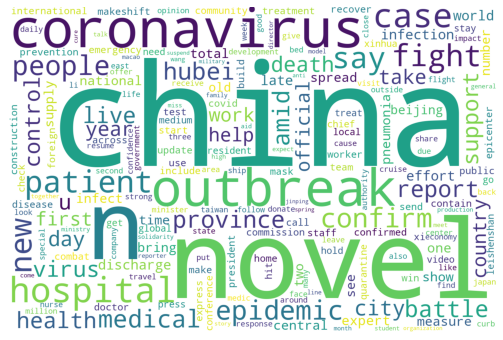

In [105]:
# from B we can retrieve the frequencies for instance : 
freq=np.sum(B).to_dict()
plot_wordcloud(freq) ##  check this,

### check for problematic tweets

In [198]:
B.sum(axis=1)

Source (A)
1231000383151116289    12.0
1230995615900934144    20.0
1230971490407010305    11.0
1230949059462037504    13.0
1230942170200276992    10.0
                       ... 
1220349820923273216     8.0
1220343345144352769    10.0
1220174533270933504     6.0
1220147584632852480    10.0
1219968312664301568     4.0
Length: 3198, dtype: float64

In [202]:
# check that tweets have at least one word
print(B.loc[B.sum(axis=1) == 0].index)
cleaned_df_text[1601] #here it is

#B.loc[B.loc[B.sum(axis=1) == 0].index]

Index(['1222512218052235264'], dtype='object', name='Source (A)')


,5g,abandon,ability,able,abnormal,aboard,abroad,absence,absolutely,absurd,...,youth,yr,yuan,yunnan,yutu,zero,zhejiang,zimbabwe,zone,zoo
Source (A),,,,,,,,,,,,,,,,,,,,,
1222512218052235264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
# dump it
B.drop(B.loc[B.sum(axis=1) == 0].index, inplace=True, axis=0)

In [220]:
# check again
print(B.loc[B.sum(axis=1) == 0].index) # now its ok

Index([], dtype='object', name='Source (A)')


The tweet incriminated to have 0 word( in the cleaned text) is actually this : 

In [224]:
china1L.reset_index(drop=True).loc[1601] ['Source (B)'] 

'Hang on, #Wuhan â_x009d_¤ï¸_x008f_ https://t.co/I7l4c5kmCa'

In [237]:
#I drop it 
china1L=china1L.reset_index(drop=True)
china1L.drop(1601, inplace=True, axis=0)
#china1L

In [238]:
china1L.reset_index(drop=True).loc[1601] ['Source (B)'] 

" 'The story of the nurses at #Wuhan No.4 Hospital \\n\\nIn order to reduce the chance of infection, Xie Jingjing, a nurse at Wuhan No. 4 Hospital, bob the hair of the colleagues and herself. "

## compute B1 matrix ( row nurmalized version of B)

In [226]:
B1 = B / np.linalg.norm(B,ord=1,axis=1, keepdims=True)

In [227]:
B1.sum(axis=1)

Source (A)
1231000383151116289    1.0
1230995615900934144    1.0
1230971490407010305    1.0
1230949059462037504    1.0
1230942170200276992    1.0
                      ... 
1220349820923273216    1.0
1220343345144352769    1.0
1220174533270933504    1.0
1220147584632852480    1.0
1219968312664301568    1.0
Length: 3197, dtype: float64

## compute B2 matrix(column-normalised-and-transposed)

In [228]:
B2_tmp = B / np.linalg.norm(B,ord=1,axis=0, keepdims=True)
B2=B2_tmp.transpose()
B2

Source (A),1231000383151116289,1230995615900934144,1230971490407010305,1230949059462037504,1230942170200276992,1230942156816338945,1230942063266537472,1230930184984875009,1230880182237450240,1230873561344045057,...,1223204744086188038,1223077869041016832,1221962289248718848,1221239982054105088,1220625821951569920,1220349820923273216,1220343345144352769,1220174533270933504,1220147584632852480,1219968312664301568
5g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abandon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ability,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
able,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abnormal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zhejiang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## power iteration method to retrieve $\tilde{m}_t$  

In [239]:
Mt = B1.dot(B2) #Istarted with the transposed B!!! 
m_i = china1L["negemo"].reset_index(drop=True)

#np.delete(m_i, obj, axis=0)
#len(m_i)

3197

In [246]:
def power_iteration(A, m_t0 ,num_simulations: int,alpha=0.85):
    '''
    A   : is the matrix of which you want the eigenvalue
    m_t0: is the starter value
    
    '''
    m_t=m_t0
    for _ in range(num_simulations):
        # calculate the matrix-by-vector product Ab
        m_t1 = alpha * np.dot(A, m_t) + (1.-alpha)*m_t0
        
        # calculate the norm   (here I sum the whole vector and then I divide it)
        m_t1_norm = np.linalg.norm(m_t1,ord=1) 

        # re normalize the vector
        m_t = m_t1 / m_t1_norm #m_t1.sum()
        #print(m_t)

    return m_t

m_t=power_iteration(Mt,m_i, 10)
#np.isnan(m_i)[np.isnan(m_t) ==True]

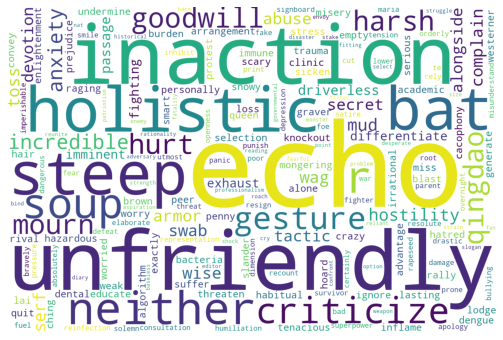

In [270]:
# let's compute mw : 
m_w =B2.dot(np.array(m_t))
plot_wordcloud(m_w.to_dict())

## Results for different time periods  USA

In [298]:
## let' s put it all in a function : 

# all in a function 

def pgrank_projection(df, emo = "negemo", n_iteration = 10, plotWC= True ):
    
    #check that the dataframe have no 0-words tweet
    check_df = len(df[df["WC"] == 0])
    if check_df != 0:
        print("dumping",check_df , "rows")
        df.drop(df[df["WC"] == 0].index, inplace=True, axis=0)  #notice it should affect the original df
        
    df_text = df["Source (B)"]
    id_tweet = df["Source (A)"].reset_index(drop=True)
    
    
    
    cleaned_df_text = [lemma_pos_cleaner(el) for el in df_text]
    marker_dict, freq_dict = frequency_marker_dictionary(cleaned_df_text, df, emo )

    B=unm_adj_matrix(freq_dict,cleaned_df_text,id_tweet )
    
    #spot difficulties in the dataframe : 
    #assert len(B.loc[B.sum(axis=1) == 0])== 0 , "Check the data !! Possible 0-word tweet!"
    check = B.loc[B.sum(axis=1) == 0]
    if len(check)!= 0  :  
        print(check.index)
        assert True, "Check the data !! Possible 0-word tweet!"
    
    
    B1 = B / np.linalg.norm(B,ord=1,axis=1, keepdims=True)
    
    B2_tmp = B / np.linalg.norm(B,ord=1,axis=0, keepdims=True)
    B2=B2_tmp.transpose()
    
    Mt = B1.dot(B2) #I started with the transposed B!!! 
    m_i = df[emo].reset_index(drop=True)
    
    m_t=power_iteration(Mt,m_i, n_iteration)
    m_w =B2.dot(np.array(m_t))
    if plotWC == True : plot_wordcloud(m_w.to_dict())
    
    return B, m_t , m_w 

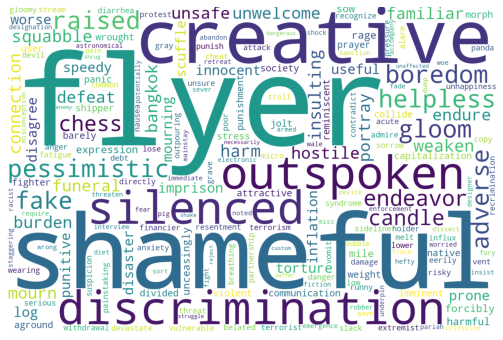

In [302]:
B_am1,m_t_a1,m_w_a1 = pgrank_projection(america1L, emo = "negemo", n_iteration = 20, plotWC= True )
m_w_a1_ord =dict(sorted(m_w_a1.to_dict().items(), key=lambda item: item[1],reverse  = True))

In [310]:
america2L[america2L['Source (A)']== '1312041956084678656']["Source (B)"]
america2L.drop(america2L[america2L['Source (A)']== '1312041956084678656'].index, inplace=True, axis=0)

/home/daniele/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


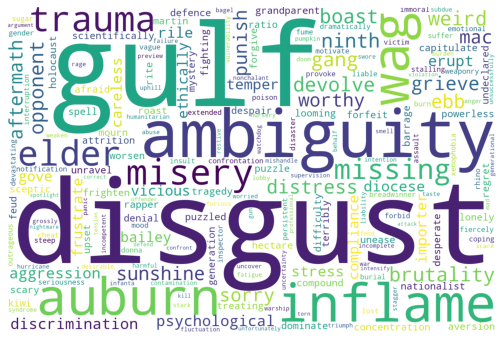

In [311]:
B_am2,m_t_a2,m_w_a2 = pgrank_projection(america2L, emo = "negemo", n_iteration = 20, plotWC= True )
m_w_a2_ord =dict(sorted(m_w_a2.to_dict().items(), key=lambda item: item[1],reverse  = True))

initial though : "auburn is a city where shootings happen in a university"
                 "gulf ? WTF"
                 "wag, really ???"

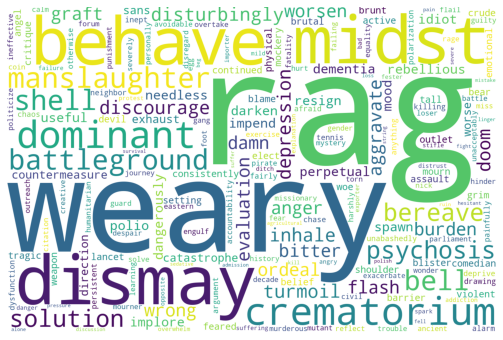

In [312]:
B_am3,m_t_a3,m_w_a3 = pgrank_projection(america3L, emo = "negemo", n_iteration = 20, plotWC= True )
m_w_a3_ord =dict(sorted(m_w_a3.to_dict().items(), key=lambda item: item[1],reverse  = True))

## Results for different time periods  China

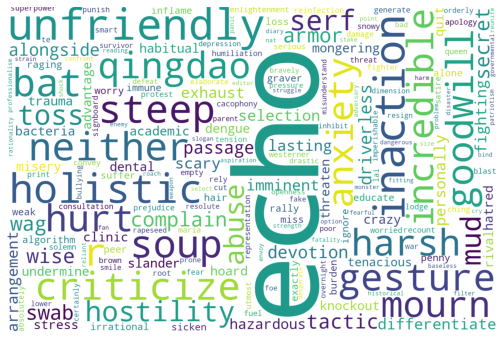

In [313]:
B_ch1,m_t_c1,m_w_c1 = pgrank_projection(china1L, emo = "negemo", n_iteration = 20, plotWC= True )
m_w_c1_ord =dict(sorted(m_w_c1.to_dict().items(), key=lambda item: item[1],reverse  = True))

In [315]:
china2L[china2L['Source (A)']== '1316614782095482880']["Source (B)"]
china2L.drop(china2L[china2L['Source (A)']== '1316614782095482880'].index, inplace=True, axis=0)

/home/daniele/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


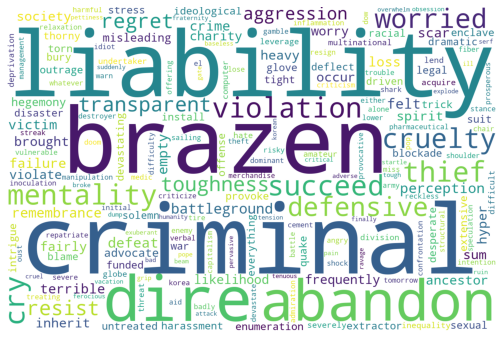

In [316]:
B_ch2,m_t_c2,m_w_c2 = pgrank_projection(china2L, emo = "negemo", n_iteration = 20, plotWC= True )
m_w_c2_ord =dict(sorted(m_w_c2.to_dict().items(), key=lambda item: item[1],reverse  = True))

In [318]:
china3L[china3L['Source (A)']== '1372064322671669248']["Source (B)"]
china3L.drop(china3L[china3L['Source (A)']== '1372064322671669248'].index, inplace=True, axis=0)

/home/daniele/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


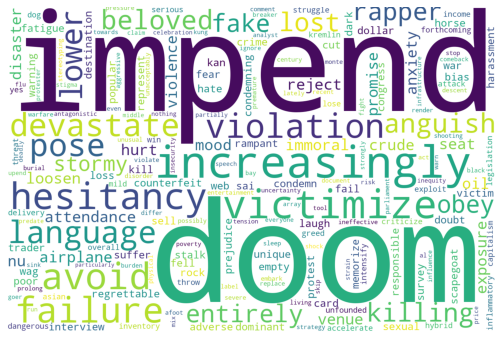

In [319]:
B_ch3,m_t_c3,m_w_c3 = pgrank_projection(china3L, emo = "negemo", n_iteration = 20, plotWC= True )
m_w_c3_ord =dict(sorted(m_w_c3.to_dict().items(), key=lambda item: item[1],reverse  = True))